In [69]:
import pandas as pd
output_path = '/Volumes/hex/ST-1233329802-res/'
p_802 = pd.read_csv(output_path + 'ST-1233329802_3.0.csv')

p_802.columns

Index(['time', 'date', 'window', 'accX', 'accX_std', 'accY', 'accY_std',
       'accZ', 'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ',
       'gyrZ_std', 'heartR', 'heartR_std', 'AirTemperature', 'AT_std',
       'PlethysmogramGreen', 'ple_std', 'mood', 'tense', 'tired', 'rumination',
       'socialize', 'socialize_val', 'work_time', 'phq_1', 'phq_2'],
      dtype='object')

In [82]:
len(p_802.index)

122084

In [81]:
p_802.groupby('date').size()

date
01.01.19    444
01.02.19    469
01.03.19    326
01.04.19    604
01.05.19    495
           ... 
30.12.18    398
31.01.19    444
31.03.19    448
31.05.19    408
31.12.18    182
Length: 250, dtype: int64

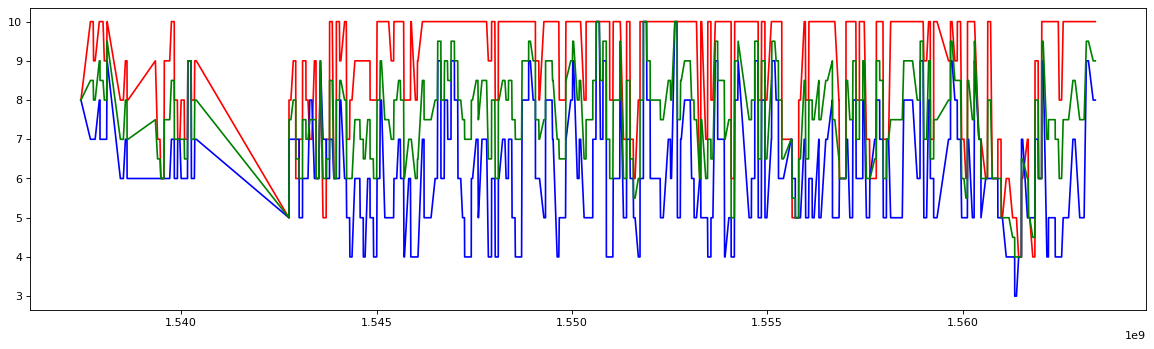

In [83]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p_802[['time']]
yaxis = p_802[['phq_1']]
yaxis2 = p_802[['phq_2']]
avg = p_802[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [14]:
# Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [12]:
def display_scores(score):
    print('scores:', score)
    print('Mean:', score.mean())
    print('std dev:', score.std())

In [25]:
train_set, test_set = train_test_split(p_802, test_size=0.25, random_state=42, shuffle=True)

In [26]:
X_train = train_set.loc[:,'accX':'work_time']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'work_time']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [27]:
X_train.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,AT_std,PlethysmogramGreen,ple_std,mood,tense,tired,rumination,socialize,socialize_val,work_time
75197,-5.71,0.03,3.80,0.03,-7.29,0.03,-0.07,0.11,0.04,0.10,...,2.20,4193342.62,81.07,3,2,0,7,90,50,110
106119,6.41,0.03,-4.11,0.04,6.07,0.04,-0.08,0.26,-0.31,0.31,...,2.38,4192824.89,78.96,1,1,1,5,8,91,220
82523,-1.82,0.03,-9.57,0.03,1.52,0.03,-0.11,0.23,0.04,0.13,...,2.34,4193368.09,76.69,3,4,2,5,66,58,225
77584,1.50,0.03,-9.47,0.03,2.11,0.03,-0.05,0.16,-0.04,0.08,...,2.12,4193336.03,83.25,3,4,1,7,88,57,155
95144,1.94,0.03,-9.56,0.03,-0.25,0.03,-0.06,0.43,0.06,0.26,...,2.42,4193291.71,78.84,3,3,3,6,83,68,85


In [28]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=35,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [37]:
y_pred_1 = rnd_reg.predict(X_train)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
forest_mse = mean_squared_error(y_train_1, y_pred_1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.6955298577881301

In [54]:
y_pred_test_1 = rnd_reg.predict(X_test)

In [57]:
forest_test_mse = mean_squared_error(y_test_1, y_pred_test_1)
forest_test_rmse = np.sqrt(forest_test_mse)
forest_test_rmse

0.7036865900611644

In [59]:
X_test.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'PlethysmogramGreen',
       'ple_std', 'mood', 'tense', 'tired', 'rumination', 'socialize',
       'socialize_val', 'work_time'],
      dtype='object')

In [39]:
from sklearn.utils import shuffle
y_shuffled = shuffle(y_pred_1)
forest_mse_shuffled = mean_squared_error(y_train_1, y_shuffled)
forest_rmse_shuffled = np.sqrt(forest_mse_shuffled)
forest_rmse_shuffled

2.026020764325277

In [40]:
forest_scores = cross_val_score(rnd_reg, X_train, y_train_1,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [0.69166483 0.7001933  0.69314818 0.67532194 0.69796137 0.67294859
 0.67321485 0.69529346 0.69674022 0.70468785]
Mean: 0.6901174586836536
std dev: 0.011211389061789378


In [64]:
# trying on another patient
output_path_4 = '/Volumes/hex/ST-1946093440-res/'
p_440 = pd.read_csv(output_path_4 + 'ST-1946093440_1.0.csv')
p_440 = p_440.drop(['AirPressure', 'AP_std', 'alc', 'cig', 'day_sleep', 'period', 'sport_time'], axis=1)
p_440.columns

Index(['time', 'window', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ',
       'accZ_std', 'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std',
       'heartR', 'heartR_std', 'AirTemperature', 'AT_std',
       'PlethysmogramGreen', 'ple_std', 'mood', 'tense', 'tired', 'rumination',
       'socialize', 'socialize_val', 'work_time', 'phq_1', 'phq_2'],
      dtype='object')

In [65]:
train_set_440, test_set_440 = train_test_split(p_440, test_size=0.25, random_state=42, shuffle=True)
X_test_440 = test_set_440.loc[:,'accX':'work_time']
y_test_440_1 = test_set_440[['phq_1']].values.ravel()
y_test_440_2 = test_set_440[['phq_2']].values.ravel()

In [66]:
y_pred_440_1 = rnd_reg.predict(X_test_440)

In [68]:
forest_test_440_mse = mean_squared_error(y_test_440_1, y_pred_440_1)
forest_test_440_rmse = np.sqrt(forest_test_440_mse)
forest_test_440_rmse

3.8200667706620464

In [41]:
# on test set
from sklearn.metrics import r2_score

y_pred_test = rnd_reg.predict(X_test)
r2_score(y_test_1, y_pred_test)

0.7865944338729565

In [42]:
# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=35, n_jobs=-1 ,oob_score=True)
rnd_clf.fit(X_train, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=35,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred_rf = rnd_clf.predict(X_train)

In [44]:
accuracy_score(y_train_1, y_pred_rf)

0.8333606369385014

In [45]:
y_shuffled_rnd = shuffle(y_pred_rf)
accuracy_score(y_train_1, y_shuffled_rnd)

0.4455293076897874